In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re 
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import tensorflow as tf 
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout,GRU
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [3]:
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df=pd.read_csv('Processed_data.csv')
df.head(10)

,Unnamed: 0,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36
5,5,6,1,Dear I think that computers have a negative af...,6,Dear I think computers negative affect us How...,956,238,14,4.016807,11,46,48,10,17
6,6,7,1,Did you know that more and more people these d...,8,Did know people days depending computers safet...,2186,500,30,4.372000,8,130,79,31,38
7,7,8,1,of people agree that computers make life less ...,8,people agree computers make life less complica...,2094,499,38,4.196393,9,124,112,32,28
8,8,9,1,"Dear reader, has had a dramatic effect on huma...",7,Dear reader dramatic effect human life It ch...,1862,447,35,4.165548,11,105,87,32,31
9,9,10,1,In the we have the technology of a computer. S...,7,In technology computer Some say computers goo...,2024,512,26,3.953125,23,102,111,42,36


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/describe.py:85: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date_start = datetime.utcnow()
100%|██████████| 15/15 [00:04<00:00,  3.18it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/describe.py:190: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date_end = datetime.utcnow()


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: asarray() got an unexpected keyword argument 'copy'

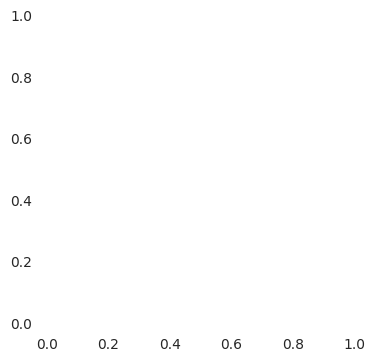

In [16]:
import numpy as np
import inspect

# Work around numpy<2.0 not accepting copy= in np.asarray (used by wordcloud)
try:
    if 'copy' not in inspect.signature(np.asarray).parameters:
        _asarray = np.asarray
        def _asarray_compat(a, dtype=None, order=None, *, like=None, copy=None):
            return _asarray(a, dtype=dtype, order=order, like=like)
        np.asarray = _asarray_compat
except (TypeError, ValueError):
    pass

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()
